The aim is to predict the currency exchange rate USD-INR. 
* Features: 
1. Date
2. Open: 
3. High:
4. Low:
5. Close:
6. Adj Close:	
7. Volume:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
data=pd.read_csv('/content/drive/MyDrive/Projects/INR=X.csv')

In [46]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-12-2003,45.709000,45.728001,45.615002,45.709999,45.709999,0.0
1,02-12-2003,45.709000,45.719002,45.560001,45.629002,45.629002,0.0
2,03-12-2003,45.632000,45.655998,45.474998,45.549999,45.549999,0.0
3,04-12-2003,45.548000,45.612999,45.519001,45.548000,45.548000,0.0
4,05-12-2003,45.549999,45.566002,45.449001,45.449001,45.449001,0.0
...,...,...,...,...,...,...,...
4986,10-01-2023,82.180099,82.529198,81.584503,82.180099,82.180099,0.0
4987,11-01-2023,81.637398,81.816299,81.498596,81.637398,81.637398,0.0
4988,12-01-2023,81.631798,81.737999,81.189697,81.631798,81.631798,0.0
4989,13-01-2023,81.115601,81.524101,81.092499,81.115601,81.115601,0.0


In [47]:
data.shape

(4991, 7)

In [48]:
data.size

34937

In [49]:
data.isna().sum()

Date          0
Open         32
High         32
Low          32
Close        32
Adj Close    32
Volume       32
dtype: int64

In [50]:
data = data.dropna()


In [51]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

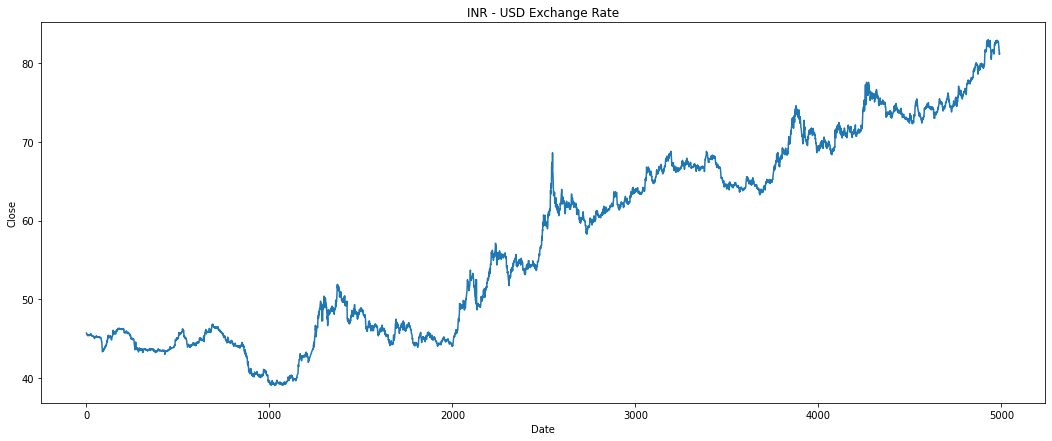

In [52]:
plt.figure(figsize=(18,7))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

## Correlation Between Features

In [53]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999850,0.999815,0.999910,0.999910,NaN
High,0.999850,1.000000,0.999746,0.999845,0.999845,NaN
Low,0.999815,0.999746,1.000000,0.999807,0.999807,NaN
Close,0.999910,0.999845,0.999807,1.000000,1.000000,NaN
Adj Close,0.999910,0.999845,0.999807,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


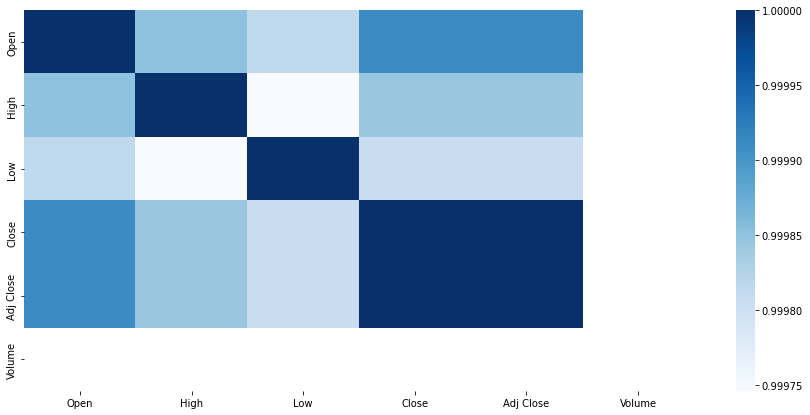

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),cmap='Blues')

## Model Building

In [55]:
# spliting the data

from sklearn.model_selection import train_test_split

In [58]:
X = data[["Open", "High", "Low"]]
y = data["Close"]
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
X_train.shape

(3471, 3)

In [67]:
X_test.shape

(1488, 3)

In [68]:
X_test

array([[67.304001, 67.760002, 67.220001],
       [56.237999, 56.264999, 55.349998],
       [47.713001, 48.943001, 47.713001],
       ...,
       [65.252998, 65.440002, 65.184998],
       [48.518002, 49.202999, 48.518002],
       [45.      , 45.      , 44.75    ]])

In [69]:
df = pd.DataFrame(X_test, columns=["Open", "High", "Low"])

In [64]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
df['Predicted'] =  y_pred
print(df.head())

        Open       High        Low  Predicted
0  67.304001  67.760002  67.220001  67.431503
1  56.237999  56.264999  55.349998  56.298000
2  47.713001  48.943001  47.713001  48.423000
3  62.166000  62.353001  62.029999  62.160000
4  46.110001  46.255001  46.095001  46.191002


## Accuracy

In [73]:
from sklearn.metrics import r2_score
score = r2_score(df["High"], df["Predicted"])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 100.0%
